In [23]:
#import Pandas, Numpy, Matplotlib, Sklearn, XGBoost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae

from sklearn.model_selection import train_test_split
import xgboost as xgb

from datetime import date
import holidays

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [24]:
df=pd.read_csv('Bookings.csv')
display(df.head())
display(df.tail())

,Year,Month,TotalBookings,TotalSales
0,2019,1,210,168000
1,2019,2,250,200000
2,2019,3,350,280000
3,2019,4,380,304000
4,2019,5,420,336000


,Year,Month,TotalBookings,TotalSales
49,2023,2,300,240000
50,2023,3,325,260000
51,2023,4,200,160000
52,2023,5,250,200000
53,2023,6,310,248000


In [25]:
df.drop('TotalBookings', axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        54 non-null     int64
 1   Month       54 non-null     int64
 2   TotalSales  54 non-null     int64
dtypes: int64(3)
memory usage: 1.4 KB


In [27]:
def is_holiday(row):
    year, month = row['Year'], row['Month']
    date = pd.Timestamp(year=year, month=month, day=1)
    ph_holidays = holidays.CountryHoliday('PH', years=[year])  # Pass years as a list
    if date in ph_holidays:
        return 1
    else:
        return 0

# Assuming df contains the DataFrame with 'Month' and 'Year' columns
df['Holidays'] = df.apply(is_holiday, axis=1)

# Group the DataFrame by 'Month' and sum the 'Holidays' column for each group
holidays_by_month = df.groupby('Month')['Holidays'].sum().reset_index()

print(holidays_by_month)

    Month  Holidays
0       1         5
1       2         1
2       3         0
3       4         1
4       5         5
5       6         0
6       7         0
7       8         0
8       9         0
9      10         0
10     11         4
11     12         0


In [28]:
df

,Year,Month,TotalSales,Holidays
0,2019,1,168000,1
1,2019,2,200000,0
2,2019,3,280000,0
3,2019,4,304000,0
4,2019,5,336000,1
5,2019,6,232000,0
6,2019,7,200000,0
7,2019,8,240000,0
8,2019,9,256000,0
9,2019,10,304000,0


In [29]:
#cyclical features
df['M1'] = np.sin(df['Month'] * (2 * np.pi / 12))
df['M2'] = np.cos(df['Month'] * (2 * np.pi / 12))
df.head()

,Year,Month,TotalSales,Holidays,M1,M2
0,2019,1,168000,1,0.500000,8.660254e-01
1,2019,2,200000,0,0.866025,5.000000e-01
2,2019,3,280000,0,1.000000,6.123234e-17
3,2019,4,304000,0,0.866025,-5.000000e-01
4,2019,5,336000,1,0.500000,-8.660254e-01


In [30]:
#define the predictor variables and the response variable
X = df[['Year','Month','Holidays','M1','M2']]
y = df['TotalSales']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

In [31]:
#instantiate the model
salesxgbmodel = XGBRegressor()

#fit the model using the training data
salesxgbmodel.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = salesxgbmodel.predict(X_test)

In [32]:
y_pred

array([185102.81 ,  78538.125, 233154.73 ,  76446.586, 303360.6  ,
       195471.6  ,  77849.16 , 159625.52 ,  78292.78 ,  41053.168,
       231972.9  , 302056.03 ,  41143.98 ,  49488.996,  51254.652,
        73763.945,  55389.31 ], dtype=float32)

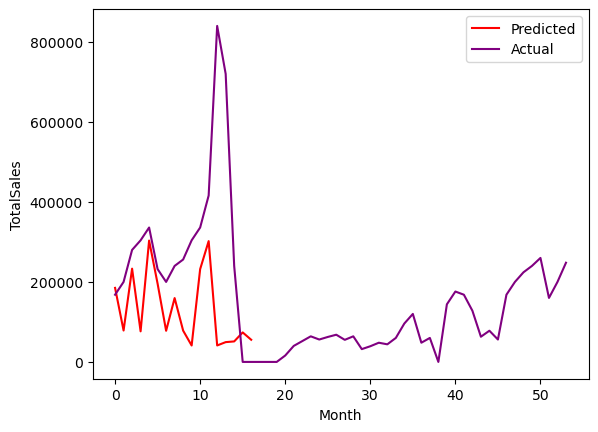

In [33]:
plt.plot(y_pred,color='red',label='Predicted')
plt.plot(y,color='purple',label="Actual")
plt.xlabel("Month")
plt.ylabel("TotalSales")
leg = plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 2641729610.639689
Mean Absolute Error: 37105.43772977941
R-squared: 0.8379328400418549


In [37]:
#save model 
import joblib 

joblib.dump(salesxgbmodel, 'booksalesforecasting-model.pkl')

['booksalesforecasting-model.pkl']

In [40]:
from datetime import date, timedelta
import pandas as pd
import numpy as np
import datetime
import calendar
from datetime import date
import holidays
import joblib

model_path = 'booksalesforecasting-model.pkl'
salesxgbmodel = joblib.load(model_path)

# Get the month and year from user input
month_name = input("Enter the month name: ")
year = input("Enter the year: ")

# Convert month name to month number
month_number = list(calendar.month_name).index(month_name.capitalize())

# Create the 'test' DataFrame
test = pd.DataFrame(columns=['Date', 'Year', 'Month', 'Holidays', 'M1', 'M2'])

# Add the user input values to the DataFrame
test.loc[0] = [pd.Timestamp(year=int(year), month=month_number, day=1), int(year), int(month_number), 0, 0.0, 0.0]

# Get Philippines holidays
ph_holidays = holidays.country_holidays('PH')

# Create 'Holidays' column and check if the date is a holiday
test['Holidays'] = [1 if x in ph_holidays else 0 for x in test['Date']]

# Convert 'Holidays' column to integer type (optional if already 0/1)
test['Holidays'] = test['Holidays'].astype(int)

# Cyclical features
test['M1'] = np.sin(test['Month'] * (2 * np.pi / 12))
test['M2'] = np.cos(test['Month'] * (2 * np.pi / 12))

# Drop 'Date' column as it is no longer needed
test.drop('Date', axis=1, inplace=True)

# Make predictions using the model
predictions = salesxgbmodel.predict(test)

# Add 'Prediction' column to the DataFrame
test['Prediction'] = predictions
test['Prediction'] = test['Prediction'].round().astype(int)
test


Enter the month name: January
Enter the year: 2023


,Year,Month,Holidays,M1,M2,Prediction
0,2023,1,1,0.5,0.866025,233155


In [41]:
newdf=pd.read_csv('Bookings.csv')
display(newdf.head())
display(newdf.tail())

,Year,Month,TotalBookings,TotalSales
0,2019,1,210,168000
1,2019,2,250,200000
2,2019,3,350,280000
3,2019,4,380,304000
4,2019,5,420,336000


,Year,Month,TotalBookings,TotalSales
49,2023,2,300,240000
50,2023,3,325,260000
51,2023,4,200,160000
52,2023,5,250,200000
53,2023,6,310,248000


In [42]:
newdf.drop('TotalBookings', axis=1, inplace=True)

In [43]:
def is_holiday(row):
    year, month = row['Year'], row['Month']
    date = pd.Timestamp(year=year, month=month, day=1)
    ph_holidays = holidays.CountryHoliday('PH', years=[year])  # Pass years as a list
    if date in ph_holidays:
        return 1
    else:
        return 0

# Assuming df contains the DataFrame with 'Month' and 'Year' columns
newdf['Holidays'] = newdf.apply(is_holiday, axis=1)


In [44]:
newdf

,Year,Month,TotalSales,Holidays
0,2019,1,168000,1
1,2019,2,200000,0
2,2019,3,280000,0
3,2019,4,304000,0
4,2019,5,336000,1
5,2019,6,232000,0
6,2019,7,200000,0
7,2019,8,240000,0
8,2019,9,256000,0
9,2019,10,304000,0


In [45]:
#cyclical features
newdf['M1'] = np.sin(df['Month'] * (2 * np.pi / 12))
newdf['M2'] = np.cos(df['Month'] * (2 * np.pi / 12))
newdf.head()

,Year,Month,TotalSales,Holidays,M1,M2
0,2019,1,168000,1,0.500000,8.660254e-01
1,2019,2,200000,0,0.866025,5.000000e-01
2,2019,3,280000,0,1.000000,6.123234e-17
3,2019,4,304000,0,0.866025,-5.000000e-01
4,2019,5,336000,1,0.500000,-8.660254e-01


In [47]:
model_path = 'booksalesforecasting-model.pkl'
salesxgbmodel = joblib.load(model_path)
X_new = newdf[['Year', 'Month', 'Holidays', 'M1', 'M2']]
y_pred = salesxgbmodel.predict(X_new)

print(y_pred)

[ 1.68000016e+05  2.00000609e+05  1.95471594e+05  3.03999031e+05
  2.31972906e+05  2.31999969e+05  1.99999969e+05  2.40000938e+05
  2.55999922e+05  3.03999438e+05  3.02056031e+05  3.03360594e+05
  8.40000188e+05  7.19999312e+05  2.40000047e+05  1.21990371e+00
 -5.44104315e-02 -2.14301884e-01 -3.75318639e-02 -1.00809324e+00
  1.60000205e+04  4.00006211e+04  4.94889961e+04  6.39999062e+04
  5.59999883e+04  6.24000547e+04  7.64465859e+04  5.51999961e+04
  4.11439805e+04  3.20002207e+04  4.10531680e+04  5.12546523e+04
  7.78491562e+04  7.85381250e+04  9.59998672e+04  1.20000062e+05
  4.79999453e+04  5.53893086e+04  7.37639453e+04  1.43999750e+05
  1.76000312e+05  1.67999859e+05  1.59625516e+05  6.30000547e+04
  7.80000078e+04  7.82927812e+04  1.68000078e+05  1.99999953e+05
  2.33154734e+05  2.40000000e+05  2.59999953e+05  1.60000125e+05
  1.99999844e+05  1.85102812e+05]


In [49]:
newdf['Prediction'] = y_pred
newdf['Prediction'] = newdf['Prediction'].round().astype(int)

In [50]:
newdf

,Year,Month,TotalSales,Holidays,M1,M2,Prediction
0,2019,1,168000,1,5.000000e-01,8.660254e-01,168000
1,2019,2,200000,0,8.660254e-01,5.000000e-01,200001
2,2019,3,280000,0,1.000000e+00,6.123234e-17,195472
3,2019,4,304000,0,8.660254e-01,-5.000000e-01,303999
4,2019,5,336000,1,5.000000e-01,-8.660254e-01,231973
5,2019,6,232000,0,1.224647e-16,-1.000000e+00,232000
6,2019,7,200000,0,-5.000000e-01,-8.660254e-01,200000
7,2019,8,240000,0,-8.660254e-01,-5.000000e-01,240001
8,2019,9,256000,0,-1.000000e+00,-1.836970e-16,256000
9,2019,10,304000,0,-8.660254e-01,5.000000e-01,303999


In [51]:
selected_columns = ['Year','Month', 'TotalSales', 'Prediction']  # Replace with your desired column names
filtered_data = newdf[selected_columns]
filtered_data

,Year,Month,TotalSales,Prediction
0,2019,1,168000,168000
1,2019,2,200000,200001
2,2019,3,280000,195472
3,2019,4,304000,303999
4,2019,5,336000,231973
5,2019,6,232000,232000
6,2019,7,200000,200000
7,2019,8,240000,240001
8,2019,9,256000,256000
9,2019,10,304000,303999


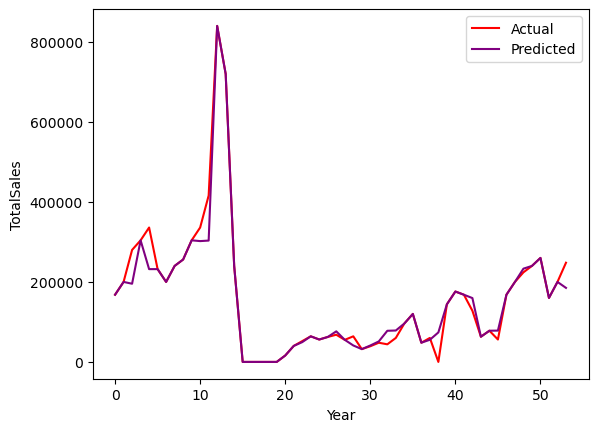

In [53]:
#First model
plt.plot(newdf['TotalSales'],color='red',label='Actual')
plt.plot(newdf['Prediction'],color='purple',label="Predicted")
plt.xlabel("Year")
plt.ylabel("TotalSales")
leg = plt.legend()
plt.show()